## Lazygrad binary classification

In [1]:
import lazygrad as lg
from lazygrad import MLP, Value, draw_dot
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
%matplotlib inline
np.random.seed(1337)
random.seed(1337)
print(lg.__version__)

0.0.5


In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
print(X.shape, type(X))
print(y.shape, type(y))

(100, 2) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>


In [3]:
print(X[:5])
print(y[:5])

[[ 1.12211461  0.08147717]
 [-0.81882941  0.05879006]
 [ 1.61370966 -0.1246459 ]
 [-0.92300918  0.3652289 ]
 [ 0.14385146  0.04438005]]
[0 0 1 0 1]


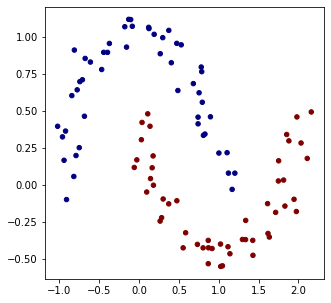

In [4]:
# visualize dataset
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [5]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print("number of parameters", len(model.parameters()))

number of parameters 337


In [6]:
output = model(X[0]).sigmoid()
output

Value(data=0.8859051832088425, grad=0)

In [7]:
def accuracy_val(model, X ,y_true):
    y_pred = np.array([model(X[i]).sigmoid().data for i in range(X.shape[0])]).round()
    correct_results = np.sum(y_pred == y_true)
    acc = correct_results/y_true.shape[0]
    acc = np.round(acc * 100)
    return acc

In [8]:
epochs = 100 
for epoch in range(epochs): 
    for i in range(X.shape[0]):
        output = model(X[i]).sigmoid()
        neg_output = 1-output
        target = y[i]
        bce_loss = -(target * output.log() + (1 - target) * neg_output.log())
        bce_loss.backward()
        for p in model.parameters():
            p.data += -0.001 * p.grad 
        model.zero_grad()
    acc = accuracy_val(model=model, X=X, y_true=y)
    if epoch%10 == 0:
        print(f"epoch: {epoch} |", f"loss: {bce_loss.data:.2f} |", f"accuracy: {acc}")

epoch: 0 | loss: 1.51 | accuracy: 51.0
epoch: 10 | loss: 0.43 | accuracy: 84.0
epoch: 20 | loss: 0.27 | accuracy: 86.0
epoch: 30 | loss: 0.19 | accuracy: 88.0
epoch: 40 | loss: 0.12 | accuracy: 90.0
epoch: 50 | loss: 0.10 | accuracy: 90.0
epoch: 60 | loss: 0.08 | accuracy: 90.0
epoch: 70 | loss: 0.07 | accuracy: 90.0
epoch: 80 | loss: 0.06 | accuracy: 92.0
epoch: 90 | loss: 0.05 | accuracy: 93.0


(-1.548639298268643, 1.951360701731357)

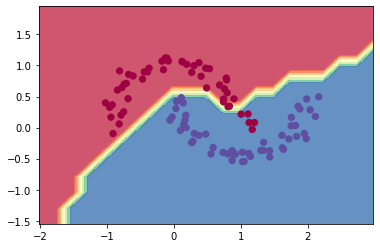

In [9]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())